# **INDIAN STARTUP ECOSYSTEM**

## Project Description
We embark on a journey of discovery as we leverage our data analysis expertise to uncover the untapped potential within the Indian startup ecosystem. This project is designed to not only decode the numbers but to distill insights that will guide our team towards a successful foray into this dynamic market.

## Scope of Work

- Conduct a thorough exploration of datasets, dissecting funding patterns, sectoral nuances, and geographical hotspots in the Indian startup landscap
- Analyze funding received by startups in india from 2018 to 2021



## Hypothesis 

**Null Hypothesis (H0)**: There is no significant relationship between funding and the sector  

**Alternative Hypothesis (H1)**: There is a significant relationship between funding and the sector

## Questions 
1. How does funding vary across different industry sectors in India?
2. How does funding vary with the loaction of the start-ups
3. What is the relationship between the amount of funding and the stage of the company?
4. How have funding trends evolved between 2018 and 2021?
5. What are the most attractive sectors for investors?
6. Does the location of the company influence its sector?




# **DATA EXPLORATION, DATA UNDERSTANDING and DATA ANALYSIS**

In [1]:
# Load libraries
# Database connnection
import pyodbc     
from dotenv import dotenv_values    #import the dotenv_values function from the dotenv package

# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# filter warnings
import warnings 
warnings.filterwarnings('ignore')

## **1. Loading and Inspection of Data**

**Load data from the SQL server**

In [2]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")

In [3]:
# Create a connection string

connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"
    
connection = pyodbc.connect(connection_string)



In [4]:
# sql query to get 2020 data. 
query_2020="SELECT * FROM dbo.LP1_startup_funding2020"

# sql query to get 2021 data. 
query_2021="SELECT * FROM dbo.LP1_startup_funding2021"

In [5]:
    # load 2021 data
data_2021=pd.read_sql(query_2021,connection)

    # load 2020 data
data_2020=pd.read_sql(query_2020,connection)

**Load CSV Files**

In [6]:
# load 2019 data
data_2019=pd.read_csv(r'C:\Users\iamde\OneDrive\Desktop\jupyter\india_startup_data\startup_funding2019.csv')

    # load 2018 data
data_2018=pd.read_csv(r'C:\Users\iamde\OneDrive\Desktop\jupyter\india_startup_data\startup_funding2018.csv')


### **2. Data Exploration and Understanding**

**Preview Each dataset**

In [7]:
# preview the rows and columns for the 2018 dataset
data_2018.sample(5)

,Company Name,Industry,Round/Series,Amount,Location,About Company
208,Streo,Music Streaming,Seed,—,"Gurgaon, Haryana, India","Live stream music from nightclubs, bars & fest..."
105,Jagaran Microfin,—,Debt Financing,"₹550,000,000","Kolkata, West Bengal, India",Jagaran Microfin is a Microfinance institution...
451,Droom Technology Private Limited,"Automotive, E-Commerce Platforms, Marketplace",Series E,30000000,"Gurgaon, Haryana, India",Droom is a marketplace for automobiles and aut...
68,&ME,"Food and Beverage, Food Processing, Nutrition",Seed,—,"Bangalore, Karnataka, India",Food and Beverage startup focussing on develop...
449,Cardekho,"Automotive, E-Commerce, Information Services",Series C,75000000,"Gurgaon, Haryana, India",Cardekho is a car search venture that helps us...


In [8]:
# get a sample of 2019 dataset
data_2019.sample(5)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
62,PiBeam,NaN,Chennai,Automotive tech,It is engaged in building sustainable and affo...,Visakh Sasikumar,GAIL (India) Ltd,"$50,000,000",NaN
15,LivFin,2017.0,Delhi,Fintech,"Grants small business loans, supply chain fina...",Rakesh Malhotra,German development finance institution DEG,"$5,000,000",NaN
80,Ola,2010.0,Bangalore,Transportation,It enables one to book cab online,"Bhavish Aggarwal, Ankit Bhati","Kia Motors, Hyundai","$311,000,000",NaN
9,Lenskart,2010.0,Delhi,E-commerce,It is a eyewear company,"Peyush Bansal, Amit Chaudhary, Sumeet Kapahi",SoftBank,"$275,000,000",Series G
17,Zest Money,2015.0,Bangalore,Fintech,Uses AI to do risk profiling of e-commerce con...,"Chapman, Priya Sharma, Ashish Anantharaman",Goldman Sachs.,"$15,000,000",Series B


In [9]:
# get a sample of 2020 dataset
data_2020.sample(5)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
1048,GoMechanic,2016.0,Delhi,Automobile Technology,Find automobile repair and maintenance service...,"Amit Bhasin, Kushal Karwa, Nitin Rana, Rishabh...","Chiratae Ventures, Sequoia Capital, Orios Vent...",14700000.0,Series B,None
483,CredoLab,2015.0,Singapore,Tech,AI credit scoring platform,Peter Barcak,"GB Group, Walden International",7000000.0,Series A,None
424,LEAD School,2012.0,Mumbai,EdtTech,Offers a high-end digital classroom system foc...,"Sumeet Mehta, Smita Deorah","Westbridge Capital, Elevar Equity",28000000.0,Series C,None
745,NewsBytes,NaN,Gurugram,Digital Media,News portal,"Romesh Khaddar, Shikha Chaudhry, Sumedh Chaudhry",North Base Media,1500000.0,Series A,None
320,Mobile Premier League,2018.0,Bangalore,Entertainment,Mobile Premier League(MPL) is a skill based E-...,"Sai Srinivas Kiran G, Shubham Malhotra","Sequoia Capital India, Times Internet",74000000.0,None,None


In [10]:
# get a sample of 2021 dataset
data_2021.sample(5)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
1183,Dukaan,2020.0,Bangalore,Retail,Help forward thinking entrepreneurs by providi...,"Suumit Shah, Subhash Choudhary","HOF Capital, Old Well Ventures, LetsVenture, 9...",$11000000,Series A
1109,Leena AI,2015.0,Gurugram,Computer Software,AI to help enterprises transform the employee ...,"Mayank Goyal, Anand Prajapati",Bessemer Venture Partners,$30000000,Series B
952,Hyperface,2021.0,Bangalore,Information Technology & Services,Empowering Brands and Fintechs to offer bankin...,"Ramanathan RV, Aishwarya Jaishankar","Kunal Shah, Better Capital",$1300000,None
938,Slice,2015.0,Bangalore,Financial Services,Slice is India's best credit card challenger t...,"Rajan Bajaj, Siva Kumar Tangudu","Tiger Global, Insight Partners",$220000000,Series B
224,Bizongo,2015.0,Mumbai,Information Technology & Services,Bizongo is India’s largest B2B platform for ma...,"Sachin Agrawal, Aniket Deb, Ankit Tomar",Tiger Global,$100000000,Series D


**Shape of the data**

In [11]:
# get the number of rows and columns for the datasets
print(f"The 2018 dataset has {data_2018.shape[0]} rows and {data_2018.shape[1]} Columns\n")
print(f"The 2019 dataset has {data_2019.shape[0]} rows and {data_2019.shape[1]} Columns\n")
print(f"The 2020 dataset has {data_2020.shape[0]} rows and {data_2020.shape[1]} Columns\n")
print(f"The 2021 dataset has {data_2021.shape[0]} rows and {data_2021.shape[1]} Columns\n\n")

The 2018 dataset has 526 rows and 6 Columns

The 2019 dataset has 89 rows and 9 Columns

The 2020 dataset has 1055 rows and 10 Columns

The 2021 dataset has 1209 rows and 9 Columns




**Info of the data**

In [12]:
# overview of 2018 dataset
data_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


In [13]:
# overview of 2019 dataset
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


In [14]:
# overview of 2020 dataset
data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.6+ KB


In [15]:
# overview of 2021 dataset
data_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


**Displaying datasets columns**

In [16]:
# 2021 data columns
data_2021.columns

Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage'],
      dtype='object')

In [17]:
# 2020 data columns

data_2020.columns

Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage', 'column10'],
      dtype='object')

In [18]:
# 2019 data columns

data_2019.columns

Index(['Company/Brand', 'Founded', 'HeadQuarter', 'Sector', 'What it does',
       'Founders', 'Investor', 'Amount($)', 'Stage'],
      dtype='object')

In [19]:
# 2018 data columns

data_2018.columns

Index(['Company Name', 'Industry', 'Round/Series', 'Amount', 'Location',
       'About Company'],
      dtype='object')

## **Observations:**
**Issues with the data**

1. There is a discrepancy in the naming conventions between the columns in the 2018 and 2019 datasets compared to the 2020 and 2021 datasets.

2. The 2018 dataset exhibits some missing columns, contributing to an incomplete representation of the data.

3. Conversely, the 2020 dataset contains an additional column that appears to be extraneous and does not serve a meaningful purpose in our analysis.

**Course of Action:**

1. **Missing Column Engineering for 2018:**
   - We will address the absence of certain columns in the 2018 dataset by employing data engineering techniques to create and populate the missing columns, ensuring a comprehensive and consistent dataset.

2. **Column Name Standardization:**
   - To establish uniformity and coherence across all datasets, we will embark on a column renaming process for the 2018 and 2019 datasets. This action aims to align the naming conventions with those observed in the 2020 and 2021 datasets, facilitating seamless data integration and analysis.

3. **Extraneous Column Removal in 2020:**
   - The redundant column identified in the 2020 dataset will be removed, streamlining the dataset and eliminating unnecessary elements that do not contribute to the overall analysis objectives.

These actions collectively enhance the integrity, consistency, and completeness of the dataset, paving the way for a more robust and coherent analytical process.
ical process.







# **3. Data Cleaning**

**Handling missing columns and currency signs in the 2018 dataset**

- The 2018 dataset has missing; 'founded', 'founders', and 'investor' columns


In [20]:
# Engineer missing columns for the 2018 dataset
columns_to_add = ['founded', 'founders', 'investor']
for column in columns_to_add:
    if column not in data_2018.columns:
        data_2018[column] = np.NaN

# Replace '₹', commas, '—', and "''" in 'Amount' column
data_2018['Amount'] = data_2018['Amount'].str.replace(',', '').str.replace('—', '').str.replace("''",'').replace('', np.nan)

# Conditionally apply multiplication only where '₹' is present
mask = data_2018['Amount'].str.contains('₹', na=False)
data_2018.loc[mask, 'Amount'] = data_2018.loc[mask, 'Amount'].str.replace('₹', '').astype(float) * 0.0146

**Data collection Year**

- There is need to add a column that represents the year each dataset was collected. This will help with handling the datasets after merging the dataframes 


In [21]:
# add year when data was collected column to every dataset
data_2018['data_year'] = pd.to_datetime('2018', format='%Y').year
data_2019['data_year'] = pd.to_datetime('2019', format='%Y').year
data_2020['data_year'] = pd.to_datetime('2020', format='%Y').year
data_2021['data_year'] = pd.to_datetime('2021', format='%Y').year

**Merge the dataframes**

**Notes**
- The function below concatenates the dataframes then renames the columns to ensure uniformity across the merged dataframe


In [22]:
# Define function to concatenate and rename columns
def concat_dfs(df_1, df_2, df_3, df_4):
    # Rename columns in individual DataFrames
    df_1.rename(columns={'Company Name': 'company_brand', 'Industry': 'sector', 'Round/Series': 'stage',
                         'Amount': 'amount($)', 'Location': 'headquater', 'About Company': 'about_company'},
                inplace=True)
    df_2.rename(columns={'Company/Brand': 'company_brand', 'Founded': 'founded', 'HeadQuarter': 'headquater',
                         'Sector': 'sector', 'What it does': 'about_company', 'Founders': 'founders',
                         'Investor': 'investor', 'Amount($)': 'amount($)', 'Stage': 'stage'},
                inplace=True)
    df_3.rename(columns={'Company_Brand': 'company_brand', 'Founded': 'founded', 'HeadQuarter': 'headquater',
                         'Sector': 'sector', 'What_it_does': 'about_company', 'Founders': 'founders',
                         'Investor': 'investor', 'Amount': 'amount($)', 'Stage': 'stage'},
                inplace=True)
    df_4.rename(columns={'Company_Brand': 'company_brand', 'Founded': 'founded', 'HeadQuarter': 'headquater',
                         'Sector': 'sector', 'What_it_does': 'about_company', 'Founders': 'founders',
                         'Investor': 'investor', 'Amount': 'amount($)', 'Stage': 'stage'},
                inplace=True)

    # Concatenate dataframes along the row axis and reset index
    df = pd.concat([df_1, df_2, df_3, df_4])

    return df


df = concat_dfs(data_2018, data_2019, data_2020, data_2021)


In [23]:
#Drop the extreneous column 10
df.drop('column10', axis=1, inplace= True)

**Cleaning 'Amount' column**

**Notes**  
- Remove all currency signs  

- Remove all other umwanted characters, words and symbols  

- Populate null values with the mode of the dataset  

- Convert the column from object to float

In [24]:

# Remove dollar sign
df['amount($)'] = df['amount($)'].replace('\$', '', regex=True)

# Remove commas
df['amount($)'] = df['amount($)'].str.replace(',', '')

# Remove all other irrelevant characters, words and symbols
df['amount($)'] = df['amount($)'].replace(["Upsparks", 'undisclosed', 'Undisclosed', "ah! Ventures", 
                                               "Pre-series A", "ITO Angel Network LetsVenture", 
                                               "JITO Angel Network LetsVenture", "Series C", 'Seed', ','], '')

# Convert the 'amount($)' column to numeric
df['amount($)'] = pd.to_numeric(df['amount($)'])

In [25]:
df['amount($)'].info()

<class 'pandas.core.series.Series'>
Index: 2879 entries, 0 to 1208
Series name: amount($)
Non-Null Count  Dtype  
--------------  -----  
1367 non-null   float64
dtypes: float64(1)
memory usage: 45.0 KB


**Cleaning data_year column**

**Notes**  


- Convert data type to period


In [26]:
# Convert the data_year column to date
df['data_year']=pd.to_datetime(df['data_year'], format='%Y')
df['data_year']=df['data_year'].dt.to_period('y')
# df['founded']=pd.to_datetime(df['founded']).dt.year

In [27]:
# check for nulls and duplicated
print(f"There are {df['data_year'].isna().sum()} Null values in the 'data_year' column")

There are 0 Null values in the 'data_year' column


In [28]:
df['data_year'].info()

<class 'pandas.core.series.Series'>
Index: 2879 entries, 0 to 1208
Series name: data_year
Non-Null Count  Dtype        
--------------  -----        
2879 non-null   period[Y-DEC]
dtypes: period[Y-DEC](1)
memory usage: 45.0 KB


**Cleaning 'founded' column**

**Notes**
- Handle nulls by populating with the 'bfill' method



In [29]:
print(f"There are {df['founded'].isna().sum()} Null values in the 'founded' column")

There are 769 Null values in the 'founded' column


**Notes**  
- There are 769 null values in the 'founded' column.  

- Since dropping the nulls will lead to a significant loss of our data, Backward fill will be used to fill the null values

In [30]:
# Convert to datetime
df['founded'] = pd.to_datetime(df['founded'], format='%Y')

# Convert to period
df['founded'] = df['founded'].dt.to_period('Y')


In [31]:
df['founded'].info()

<class 'pandas.core.series.Series'>
Index: 2879 entries, 0 to 1208
Series name: founded
Non-Null Count  Dtype        
--------------  -----        
2110 non-null   period[Y-DEC]
dtypes: period[Y-DEC](1)
memory usage: 45.0 KB


**Cleaning the 'founders' column**

In [32]:
# Remove unwanted characters
df['founders'] = df['founders'].replace(['...', np.nan], np.NaN)

# Check the number of NaN values in the 'founders' column
nan_count = df['founders'].isna().sum()

print(nan_count)

545


In [33]:
df['founders'].info()

<class 'pandas.core.series.Series'>
Index: 2879 entries, 0 to 1208
Series name: founders
Non-Null Count  Dtype 
--------------  ----- 
2334 non-null   object
dtypes: object(1)
memory usage: 45.0+ KB


**Cleaning **Stage** column**

Startups start with pre-seed, progress through seed, Series A, Series B, etc., securing resources for development and strategies. Additional rounds like Series C or D may follow. External funding at each stage fuels growth toward the venture's full potential.

**Pre-Seed Funding**  
Entrepreneurial idea in early development; small funds needed; limited informal channels for raising funds.

**Seed Funding**  
First official equity funding; investors provide funds for equity ownership.

**Series A Financing**  
First venture capital round; developed product, consistent revenue, long-term profit plan.

**Series B Financing**  
For established startups; substantial user base and revenue; funding for expansion.

**Series C and Beyond**  
Optional rounds for final push before IPO or unmet objectives; Series C is the third venture capital round.

**Initial Public Offering (IPO)**  
Process of offering corporate shares to the public; used for funding or divestment.

link: https://www.startupindia.gov.in/content/sih/en/funding.html

In [34]:
# Cleaning stage column
df['stage'].unique()
df['stage']=df['stage'].replace(['https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593',
'$6000000','$1000000','$300000','$1200000'],np.NaN)

In [35]:
# Standardize funding stages in the 'stage' column
df['stage'] = df['stage'].replace(['Series A', 'Seies A', 'Series A-1', 'Series A2', 'Series A+', 'Series A+'], 'Series A')
df['stage'] = df['stage'].replace(['Pre-seed', 'Pre-seed Round', 'Pre seed Round', 'Pre seed round'], 'Pre-Seed Stage')
df['stage'] = df['stage'].replace(['Pre series A', 'Pre-series A', 'Pre Series A', 'Pre series A1', 'Pre-series A1', 'Pre- series A'], 'Pre series A')
df['stage'] = df['stage'].replace(['Series B', 'Series B+', 'Series B2', 'Series B3'], 'Series B')
df['stage'] = df['stage'].replace(['Series C', 'Series C', 'Series C, D','Series C', 'Private Equity','PE', 'Post-IPO Equity','Series D', 'Series E', 'Series F', 'Series G', 'Series H', 'Series I','Series D1','Series F2', 'Series F1'], 'Series C and Beyond')
df['stage'] = df['stage'].replace(['Venture - Series Unknown', None,'Grant','Debt','Debt Financing','Post-IPO Debt','Non-equity Assistance','Bridge','Bridge Round','Fresh funding','Funding Round','Mid series','Edge',], 'unknown')
df['stage'] = df['stage'].replace(['Corporate Round','Undisclosed','Secondary Market','Pre-series','Post series A','Pre-series B','Pre-Series B','Pre series B','Pre-series C','Pre series C'], 'Other Stages')
df['stage'] = df['stage'].replace(['Seed','Seed funding','Pre-Seed','Angel', 'Angel Round','Seed fund', 'Seed round', 'Seed A','Seed Funding', 'Seed Round & Series A', 'Series E2', 'Seed Round','Seed Investment','Seed+','Early seed'],'Seed Stage')

In [36]:
df['stage'].info()

<class 'pandas.core.series.Series'>
Index: 2879 entries, 0 to 1208
Series name: stage
Non-Null Count  Dtype 
--------------  ----- 
2879 non-null   object
dtypes: object(1)
memory usage: 45.0+ KB


In [37]:
df['stage'].isna().sum()

0

In [38]:
df['stage'].value_counts()

stage
unknown                1060
Seed Stage              746
Series A                309
Pre series A            291
Series C and Beyond     232
Series B                138
Pre-Seed Stage           65
Other Stages             38
Name: count, dtype: int64

**Cleaning the Sector Column**

In [39]:
# Get the first sentence of every list
df['sector']=df['sector'].str.split(",").str[0]

In [61]:
df['sector'] = df['sector'].replace({
    'Edtech': 'EdTech', 'Fintech': 'FinTech', 'Agriculture': 'AgriTech', 'Food & Beverages': 'Food and Beverages',
    'Financial Services': 'FinTech', 'Healthcare': 'HealthTech', 'HealthTech': 'HealthTech', 'Medical': 'HealthTech', 
    'Medtech': 'HealthTech', 'Pharmaceutical': 'HealthTech', 'Health Insurance': 'HealthTech', 
    'Biotechnology': 'HealthTech', 'Health Diagnostics': 'HealthTech', 'Hospital': 'HealthTech', 
    'Hospital & Health Care': 'HealthTech', 'Wellness': 'HealthTech', 'Dental': 'HealthTech', 
    'Alternative Medicine': 'HealthTech', 'Nutrition': 'HealthTech', 'Fitness': 'HealthTech', 
    'Mental Health': 'HealthTech', 'Healthcare/Edtech': 'HealthTech',
    'Life sciences': 'HealthTech', 'Biotech': 'Healthcare', 'Nutrition Tech': 'HealthTech', 
    'E-mobility': 'HealthTech', 'Med Tech': 'HealthTech', 'FemTech': 'HealthTech', 
    'Cannabis startup': 'HealthTech', 'Pharmacy': 'HealthTech', 'Medical Device': 'HealthTech', 
    'BioTechnology': 'HealthTech', 'Fertility tech': 'HealthTech', 'Ayurveda tech': 'HealthTech', 
    'E-tail': 'Healthcare', 'E store': 'E-Commerce', 'E-store': 'Healthcare', 'Telemedicine': 'Healthcare', 
    'HealthCare': 'HealthTech', 'AI startup': 'AI', 'Information Services': 'InfoTech', 
    'Healthtech': 'HealthTech', 'Finance': 'FinTech', 'Health Care': 'HealthTech', 
    'Logistics & Supply Chain': 'Logistics', 'Food Industry': 'FoodTech', 'Foodtech': 'FoodTech', 
    '—': 'Undisclosed', 'SaaS startup': 'SaaS', 'Health': 'HealthTech', 'Ecommerce': 'E-Commerce', 
    'Tech Startup': 'Tech', 'Mobility': 'Transportation', 'SaaS': 'Tech', 'Artificial Intelligence': 'AI', 
    'Food and Beverage': 'Food and Beverages', 'Information Technology': 'InfoTech', 
    'Internet': 'Tech', 'Apps': 'Tech', 'Computer Software': 'Tech', 'E-commerce': 'E-Commerce', 
    'Agritech': 'AgriTech', 'Hospital & Health Care': 'HealthTech', 'Food': 'Foodtech', 'Cosmetics': 'Consumer Goods', 
    'Tech company': 'Tech', 'Automobile': 'Automotive', 'Apparel & Fashion': 'Fashion', 'Education': 'EdTech', 
    'Social Media': 'Media', 'Digital Media': 'Media', 'IT': 'InfoTech', 'IoT': 'AI', 
    'Software': 'Tech', 'Industrial Automation': 'AI', 'Technology': 'Tech', 
    'Information Technology & Services': 'InfoTech & Services', None: 'Unknown'
})




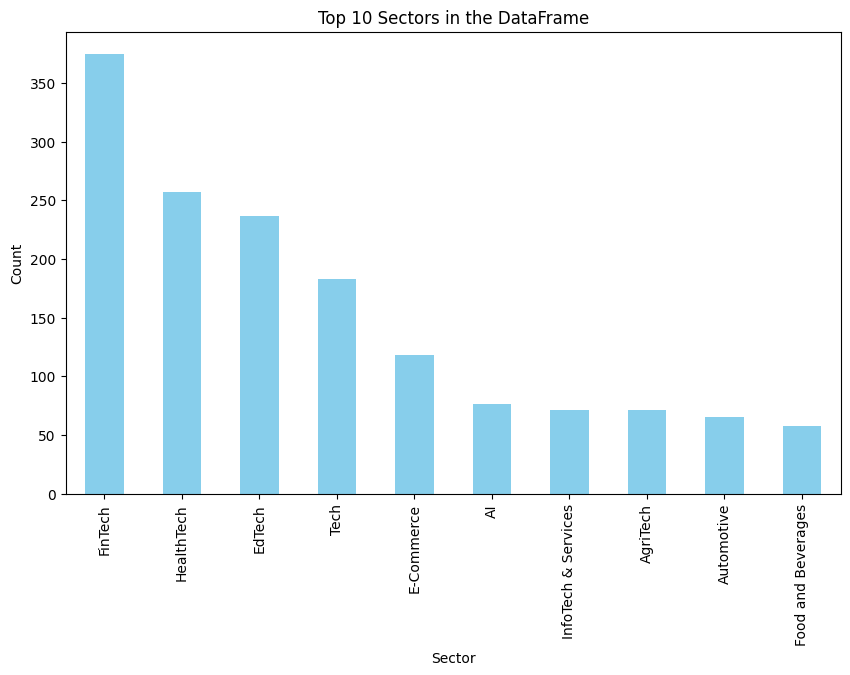

In [62]:
top_sectors_counts = df['sector'].value_counts().head(10)

# Plotting the bar chart
ax = top_sectors_counts.plot(kind='bar', figsize=(10, 6), color='skyblue')

# Adding labels
ax.set_xlabel('Sector')
ax.set_ylabel('Count')
ax.set_title('Top 10 Sectors in the DataFrame')

# Displaying the plot
plt.show()

**Correct naming variations in the headquater column**

In [ ]:
# Get the first location from every list
df['headquater']=df['headquater'].str.split(",").str[0]

In [ ]:
df['headquater']=df['headquater'].replace({'Bengaluru': 'Bangalore', 'Banglore': 'Bangalore', 'Gurugram': 'Gurgaon', 'Hyderebad': 'Hyderabad', 
                                      'New Delhi': 'Delhi', 'Ahmadabad': 'Ahmedabad', 'Ernakulam': 'Cochin', 'Telugana': 'Telangana',
                                      'Rajastan': 'Rajasthan', 'San Franciscao': 'San Francisco', 'Samsitpur': 'Samastipur', 'Santra': 'Samtra',
                                      'Rajsamand': 'Rajasthan', 'Kerala': 'Kochi','The Nilgiris': 'Nilgiris', 'Gurugram\t#REF!': 'Gurgaon', 
                                      'California': 'San Francisco', 'San Francisco Bay Area': 'San Francisco', 'Hyderebad': 'Hyderabad',
                                      'Online Media\t#REF!': 'Unknown','Pharmaceuticals\t#REF!': 'Unknown',
                                      'Information Technology & Services':'Unknown' ,'Small Towns': 'Unknown','Orissia': 'Odisha', 
                                      'Santra': 'Samtra', 'Vadodara': 'Vadodara', 'Food & Beverages': 'Unknown', 'Bangaldesh': 'Bangladesh',}) 


In [ ]:
df.head(10)